# Simple Linear Regression

## Importing the dataset

In [1]:
# Reads a file in table format and creates a data frame from it, with cases corresponding to lines and variables to fields in the file.
dataset = read.csv('Salary_Data.csv')
dataset

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445
3.7,57189


## Splitting the dataset into the Training set and Test set

In [2]:
# Download and install packages from CRAN-like repositories or from local files.
# install.packages('caTools')

In [3]:
library(caTools)
set.seed(123)

split = sample.split(dataset$Salary, SplitRatio=2/3)
training_set = subset(dataset, split==TRUE)
test_set = subset(dataset, split==FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [4]:
cat("training_set_shape: ", dim(training_set)[1], ",", dim(training_set)[2], "\n")
cat("test_set_shape: ", dim(test_set)[1], ",", dim(test_set)[2], "\n")

training_set_shape:  20 , 2 
test_set_shape:  10 , 2 


## Fitting Simple Linear Regression to the Training set

In [5]:
# lm is used to fit linear models. It can be used to carry out regression, single stratum analysis of variance and analysis of covariance 
regressor = lm(formula=Salary ~ YearsExperience,
               data=training_set)
regressor


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Coefficients:
    (Intercept)  YearsExperience  
          25592             9365  


y_pred = predict(regressor, newdata=test_set)
y_pred## Predicting the Test set results

In [6]:
# predict is a generic function for predictions from the results of various model fitting functions.
y_pred = predict(regressor, newdata=test_set)
data.frame(y_test=test_set$Salary, y_pred=y_pred)

,y_test,y_pred
2,46205,37766.77
4,43525,44322.33
5,39891,46195.35
8,54445,55560.43
11,63218,62115.99
16,67938,71481.07
20,93940,81782.66
21,91738,89274.72
24,113812,102385.84
26,105582,109877.90


## Visualising the Training set results

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


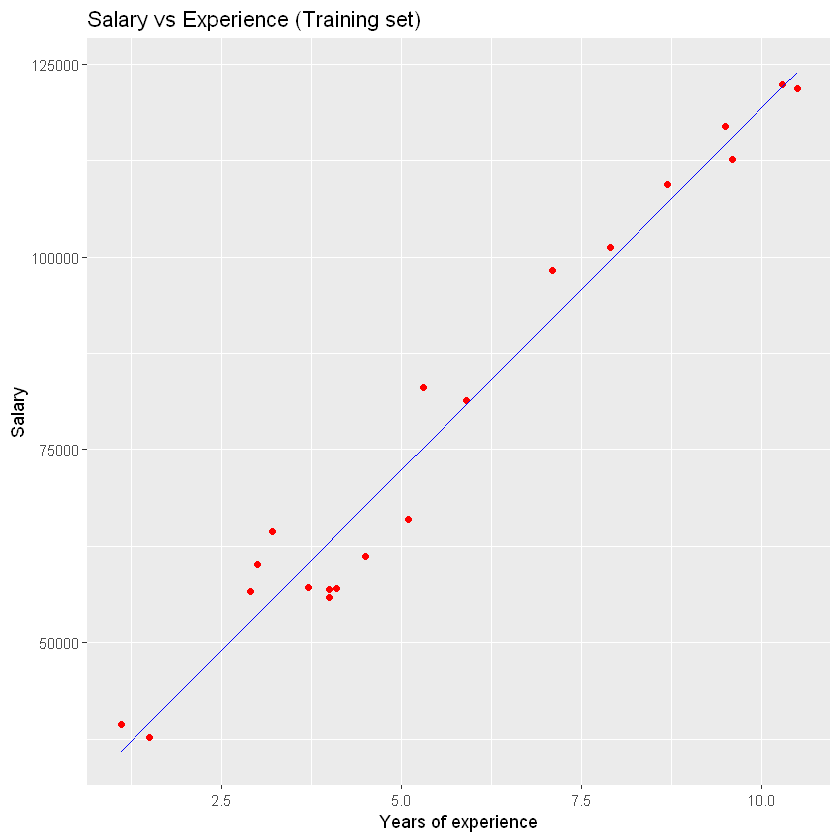

In [7]:
library(ggplot2)
ggplot() +
geom_point(aes(x=training_set$YearsExperience, y=training_set$Salary), colour='red') +
geom_line(aes(x=training_set$YearsExperience, y=predict(regressor, newdata=training_set)), colour='blue') +
ggtitle('Salary vs Experience (Training set)') +
xlab('Years of experience') +
ylab('Salary')

## Visualising the Test set results

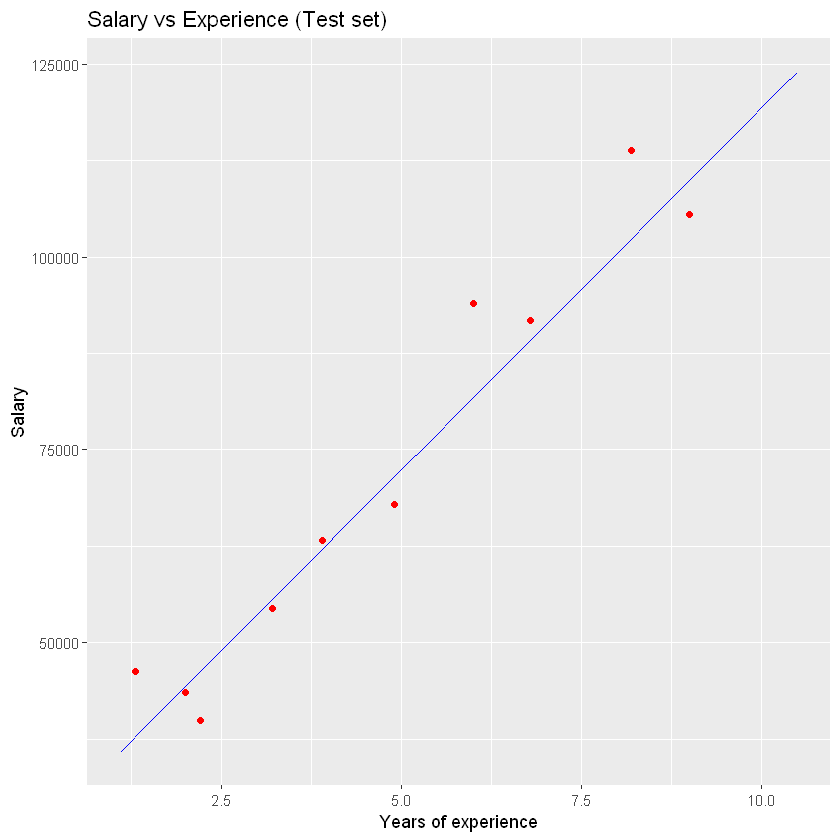

In [8]:
library(ggplot2)
ggplot() +
geom_point(aes(x=test_set$YearsExperience, y=test_set$Salary), colour='red') +
geom_line(aes(x=training_set$YearsExperience, y=predict(regressor, newdata = training_set)), colour='blue') +
ggtitle('Salary vs Experience (Test set)') +
xlab('Years of experience') +
ylab('Salary')